<a href="https://colab.research.google.com/github/Gokul0Krishna/exp/blob/main/exp6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip "/content/archive (1).zip"

Archive:  /content/archive (1).zip
  inflating: aquarium_pretrain/README.dataset.txt  
  inflating: aquarium_pretrain/README.roboflow.txt  
  inflating: aquarium_pretrain/data.yaml  
  inflating: aquarium_pretrain/test/images/IMG_2289_jpeg_jpg.rf.fe2a7a149e7b11f2313f5a7b30386e85.jpg  
  inflating: aquarium_pretrain/test/images/IMG_2301_jpeg_jpg.rf.2c19ae5efbd1f8611b5578125f001695.jpg  
  inflating: aquarium_pretrain/test/images/IMG_2319_jpeg_jpg.rf.6e20bf97d17b74a8948aa48776c40454.jpg  
  inflating: aquarium_pretrain/test/images/IMG_2347_jpeg_jpg.rf.7c71ac4b9301eb358cd4a832844dedcb.jpg  
  inflating: aquarium_pretrain/test/images/IMG_2354_jpeg_jpg.rf.396e872c7fb0a95e911806986995ee7a.jpg  
  inflating: aquarium_pretrain/test/images/IMG_2371_jpeg_jpg.rf.54505f60b6706da151c164188c305849.jpg  
  inflating: aquarium_pretrain/test/images/IMG_2379_jpeg_jpg.rf.7dc3160c937072d26d4624c6c48e904d.jpg  
  inflating: aquarium_pretrain/test/images/IMG_2380_jpeg_jpg.rf.a23809682eb1466c1136ca0f55de8fb5

In [3]:
import os
import cv2
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from skimage.feature import hog
from matplotlib.pyplot import imread, imshow, subplots, text, show
import joblib

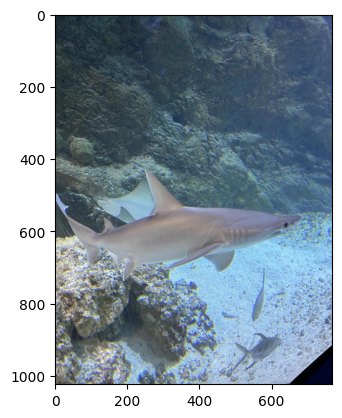

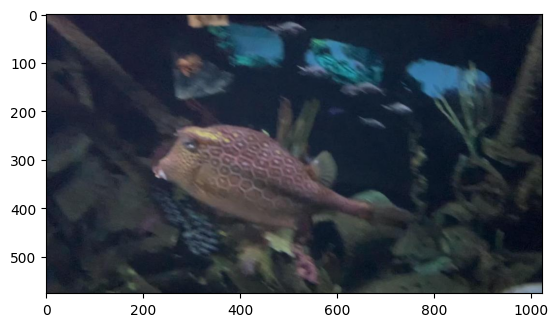

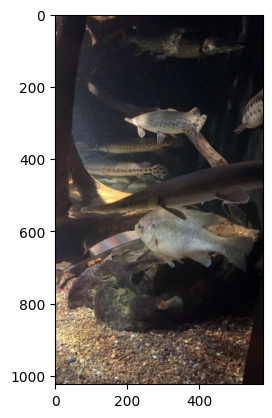

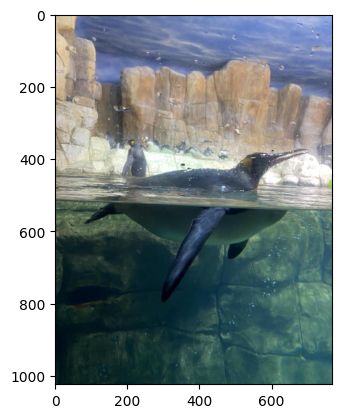

In [6]:
a=0
for i in os.listdir("/content/aquarium_pretrain/train/images"):
  img=imread(f"/content/aquarium_pretrain/train/images/{i}")
  imshow(img)
  show()
  a+=1
  if a==4:
    break

In [8]:
imagelist=[]
labellist=[]
for i in os.listdir("/content/aquarium_pretrain/train/images"):
  imagelist.append(f"/content/aquarium_pretrain/train/images/{i}")
for i in os.listdir("/content/aquarium_pretrain/train/labels"):
  labellist.append(f"/content/aquarium_pretrain/train/labels/{i}")

In [10]:
X,Y=[],[]
for i in range(len(imagelist)):
  img=imread(imagelist[i])
  height, width = img.shape[:2]
  with open(labellist[i], "r") as f:
        for line in f.readlines():
            parts = line.strip().split()
            cls_id = int(parts[0])
            x_center, y_center, w, h = map(float, parts[1:])

            # Convert to pixel coordinates
            x_center *= width
            y_center *= height
            w *= width
            h *= height

            x1 = int(x_center - w / 2)
            y1 = int(y_center - h / 2)
            x2 = int(x_center + w / 2)
            y2 = int(y_center + h / 2)

            # Crop object
            crop = img[y1:y2, x1:x2]
            if crop.size == 0:
                continue

            # Resize crop to standard size for HOG
            crop_resized = cv2.resize(crop, (64, 128))  # HOG default window

            # Convert to grayscale for HOG
            gray = cv2.cvtColor(crop_resized, cv2.COLOR_BGR2GRAY)

            # Extract HOG features
            features = hog(gray,
                           orientations=9,
                           pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2),
                           block_norm='L2-Hys',
                           transform_sqrt=True,
                           feature_vector=True)
            X.append(features)
            Y.append(cls_id)


In [11]:
X = np.array(X)
y = np.array(Y)
clf = LinearSVC(max_iter=10000)
clf.fit(X, y)

LinearSVC(max_iter=10000)

In [12]:
imagelist=[]
labellist=[]
for i in os.listdir("/content/aquarium_pretrain/valid/images"):
  imagelist.append(f"/content/aquarium_pretrain/valid/images/{i}")
for i in os.listdir("/content/aquarium_pretrain/valid/labels"):
  labellist.append(f"/content/aquarium_pretrain/valid/labels/{i}")
X,Y=[],[]
for i in range(len(imagelist)):
  img=imread(imagelist[i])
  height, width = img.shape[:2]
  with open(labellist[i], "r") as f:
        for line in f.readlines():
            parts = line.strip().split()
            cls_id = int(parts[0])
            x_center, y_center, w, h = map(float, parts[1:])

            # Convert to pixel coordinates
            x_center *= width
            y_center *= height
            w *= width
            h *= height

            x1 = int(x_center - w / 2)
            y1 = int(y_center - h / 2)
            x2 = int(x_center + w / 2)
            y2 = int(y_center + h / 2)

            # Crop object
            crop = img[y1:y2, x1:x2]
            if crop.size == 0:
                continue

            # Resize crop to standard size for HOG
            crop_resized = cv2.resize(crop, (64, 128))  # HOG default window

            # Convert to grayscale for HOG
            gray = cv2.cvtColor(crop_resized, cv2.COLOR_BGR2GRAY)

            # Extract HOG features
            features = hog(gray,
                           orientations=9,
                           pixels_per_cell=(8, 8),
                           cells_per_block=(2, 2),
                           block_norm='L2-Hys',
                           transform_sqrt=True,
                           feature_vector=True)
            X.append(features)
            Y.append(cls_id)

In [13]:
X = np.array(X)
y = np.array(Y)
y_pred = clf.predict(X)
CLASS_NAMES = ['fish', 'jellyfish', 'penguin', 'puffin', 'shark', 'starfish', 'stingray']
print(classification_report(y, y_pred, target_names=CLASS_NAMES))

              precision    recall  f1-score   support

        fish       0.51      0.58      0.55       459
   jellyfish       0.13      0.10      0.11       155
     penguin       0.12      0.12      0.12       104
      puffin       0.12      0.07      0.09        74
       shark       0.08      0.12      0.10        57
    starfish       0.12      0.04      0.06        27
    stingray       0.03      0.03      0.03        33

    accuracy                           0.34       909
   macro avg       0.16      0.15      0.15       909
weighted avg       0.32      0.34      0.32       909



In [14]:
joblib.dump(clf,"marine_life.joblib")

['marine_life.joblib']